In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
#load datasets
product = pd.read_csv('Product.csv',dtype={"CLNT_ID": np.str, "SESS_ID": np.str, "PD_C":np.str},encoding='utf-8')
master = pd.read_csv('new_master.csv',dtype={"PD_C":np.str},encoding='utf-8')
session = pd.read_csv('new_session.csv',dtype={"CLNT_ID": np.str, "SESS_ID": np.str,"SESS_DT": np.str},encoding='utf-8')
search1 = pd.read_csv('search1.csv',dtype={"CLNT_ID":np.str,"SESS_ID":np.str,"KWD_NM":np.str},encoding='utf-8')
search2 = pd.read_csv('search2.csv',encoding='utf-8')
custom = pd.read_csv('custom.csv',dtype={"CLNT_ID": np.str},encoding='utf-8')

C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#merge datasets
m1 = pd.merge(product,session,on=['CLNT_ID','SESS_ID'])
m2 = pd.merge(m1,custom,on='CLNT_ID')
TotalData = pd.merge(m2,master,on='PD_C')

In [6]:
TotalData.head()
#TotalData['SESS_ID','HITS_SEQ','PD_BUY_AM','PD_BUY_CT','SESS_SEQ','DVC_CTG_NM','ZON_NM','CITY_NM','CLNT_GENDER','CLNT_AGE','CLAC1_NM']

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM
0,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2,172,20180413,...,Icheon-si,Friday,weekday,F,40,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
1,4148106,06537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,"39,000",1,58,20180613,...,Gwangju,Wednesday,weekend,F,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
2,4148106,06662803,94,570603,색상:WHT0_WHT0-(WHITE)|사이즈:115 / 1개,데상트,"39,000",1,55,20180611,...,Seoul,Monday,weekday,F,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
3,5298612,04443505,129,570603,색상:BLK0_(BLK0)BLACK|사이즈:105 / 1개,데상트,"39,000",1,710,20180717,...,Busan,Tuesday,weekday,F,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
4,5553084,06453463,55,570603,색상:WHT0_WHT0-(WHITE)|사이즈:100 / 1개,데상트,"39,000",1,772,20180614,...,Seoul,Thursday,weekday,F,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저


In [7]:
#from sklearn.preprocessing import LabelEncoder
#number = LabelEncoder()
import re
#remove comma from amount
TotalData['PD_BUY_AM']=TotalData['PD_BUY_AM'].apply(lambda x: re.sub("[^\d\.]", "", x))
TotalData['weekday/weekend'] = number.fit_transform(TotalData['weekday/weekend'].astype('str'))
TotalData['CLNT_GENDER'] = number.fit_transform(TotalData['CLNT_GENDER'].astype('str'))
TotalData['CITY_NM'] = number.fit_transform(TotalData['CITY_NM'].astype('str'))
TotalData['PD_BUY_AM']=TotalData['PD_BUY_AM'].apply(lambda x: int(x))
TotalData.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM
0,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,172,20180413,...,78,Friday,0,0,40,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
1,4148106,06537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,39000,1,58,20180613,...,58,Wednesday,1,0,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
2,4148106,06662803,94,570603,색상:WHT0_WHT0-(WHITE)|사이즈:115 / 1개,데상트,39000,1,55,20180611,...,122,Monday,0,0,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
3,5298612,04443505,129,570603,색상:BLK0_(BLK0)BLACK|사이즈:105 / 1개,데상트,39000,1,710,20180717,...,12,Tuesday,0,0,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
4,5553084,06453463,55,570603,색상:WHT0_WHT0-(WHITE)|사이즈:100 / 1개,데상트,39000,1,772,20180614,...,122,Thursday,0,0,30,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저


# Multi-Logistic

In [8]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split

C:\Users\pj903\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
def main():
    data_headers = ['SESS_ID','HITS_SEQ','PD_BUY_AM','SESS_SEQ','CLNT_AGE','weekday/weekend','CITY_NM','CLNT_GENDER','CLAC0_NM']
    data = TotalData
 
    train_x, test_x, train_y, test_y = train_test_split(data[data_headers[:-1]],data[data_headers[-1]], train_size=0.7)
    # Train multi-class logistic regression model
    lr = linear_model.LogisticRegression()
    lr.fit(train_x, train_y)
     
    # Train multinomial logistic regression model
    mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
  
    print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x)))
    print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x)))
 
if __name__ == "__main__":
    main()

C:\Users\pj903\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Multinomial Logistic regression Train Accuracy ::  0.4175747937865552
Multinomial Logistic regression Test Accuracy ::  0.4170162053925489


In [21]:
import matplotlib.font_manager as fm
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]
# ttf 폰트 전체개수
print(len(font_list))
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

버전:  3.0.2
설치 위치:  C:\Users\pj903\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\pj903\.matplotlib
캐시 위치:  C:\Users\pj903\.matplotlib
설정 파일 위치:  C:\Users\pj903\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
946
946


[]

In [24]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['Nanum Brush Script OTF']


In [25]:
mpl.rc('font', family='nanumgothic')

C:\Users\pj903\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


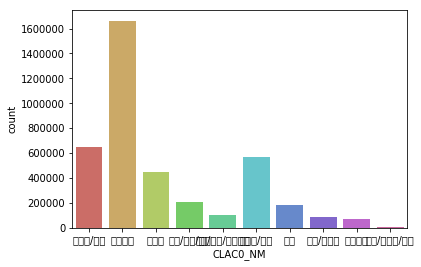

In [26]:
import seaborn as sns
sns.countplot(x='CLAC0_NM',data=TotalData, palette='hls')
plt.show()

# Data

In [8]:
data_headers = ['SESS_ID','HITS_SEQ','PD_BUY_AM','SESS_SEQ','CLNT_AGE','CLAC0_NM']
data = TotalData
X_train, X_test, y_train, y_test = train_test_split(data[data_headers[:-1]],data[data_headers[-1]], train_size=0.7)

y_train = y_train.ravel()
y_test = y_test.ravel()

print ("Size of training data:")
print (X_train.shape)
print (y_train.shape)
print ("No of unique labels: {}".format(np.unique(y_train)))
print ("")
print ("Size of test data:")
print (X_test.shape)
print (y_test.shape)

# for report
classifier_r = []
parameters_r = []
f1score_r = []
accuracy_r = []

Size of training data:
(2792010, 5)
(2792010,)
No of unique labels: ['가구/침구/인테리어' '가전/디지털' '반려동물' '스포츠/레저' '식품' '여행/서비스/금융' '유아동' '주방/생활/건강'
 '패션의류' '화장품/뷰티']

Size of test data:
(1196577, 5)
(1196577,)


# Multiclass Logistic Regression with Elastic Net

In [16]:
alpha_val = [1e-4,3e-4,1e-3,3e-3,1e-2,3e-2,3e-4,1e-3,3e-3,1e-2]
l1 = [0,0.15,0.5,0.7,1]

alpha_ = []
l1_ = []
fscore = []
accur = []
print("Running ...")
print("") 

print ("\tAlpha\t\tL1 Ratio\tF1-score\tAccuracy")

for i in range(0,6):
    for j in l1:
        enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val[i], l1_ratio=j) 
        enet.fit(X_train, y_train)
        y_pred = enet.predict(X_train)
        enet_acc = accuracy_score(y_pred, y_train)
        y_pred = cross_val_predict(enet, X_train, y_train, cv=10)
        en_f1score = f1_score(y_train, y_pred, average='weighted')
        en_accuracy = accuracy_score(y_train, y_pred)
        alpha_.append(alpha_val[i])
        l1_.append(j)
        fscore.append(en_f1score)
        accur.append(accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(alpha_val[i],j,en_f1score, en_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...

	Alpha		L1 Ratio	F1-score	Accuracy


C:\Users\pj903\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\pj903\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\pj903\Anaconda3\lib\sit

KeyboardInterrupt: 

In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_alpha = alpha_[idx]
best_l1 = l1_[idx]
print ("The best parameters are alpha={}, l1={}".format(best_alpha, best_l1))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(alpha_, l1_)

ax.plot_surface(X, Y, fscore)
ax.set_xlabel('Alpha')
ax.set_ylabel('L1')
ax.set_zlabel('F1 score')
plt.show()

In [ ]:
# test performance
start_time = time.time()
print("Running ...")
print ("\tAlpha\t\tL1 Ratio\tF1-score\tAccuracy")

enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=best_alpha, l1_ratio=best_l1) 
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
en_test_acc = accuracy_score(y_test, y_pred)
en_test_f1score = f1_score(y_test, y_pred, average='weighted')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_alpha, best_l1, en_test_f1score, en_test_acc))
print ("Confusion matrix")
print (confusion_matrix(y_test, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("EN")
parameters_r.append("Alpha={}, L1={}".format(best_alpha, best_l1))
f1score_r.append(en_test_f1score)
accuracy_r.append(en_test_acc)

# KNN

In [18]:
# build model
def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator), 
    '''
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

start_time = time.time()
print("Running ...") 
k_val = []
f_score = []
acc = []
print ("\tK\t\tF1-score\tAccuracy")

# Build a kNN using 1-50 neighbour nodes
for i in range(1,51):
    k_val.append(i)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    y_pred = cross_val_predict(knn_model, X_train, y_train, cv=10)
    knn_f1score = f1_score(y_train, y_pred, average='weighted')
    knn_accuracy = accuracy_score(y_train, y_pred)
    f_score.append(knn_f1score)
    acc.append(knn_accuracy)
    print ("\t{:f}\t{:f}\t{:f}".format(i,knn_f1score, knn_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	K		F1-score	Accuracy
	1.000000	0.425706	0.427003
	2.000000	0.353047	0.348435
	3.000000	0.362587	0.361016
	4.000000	0.364006	0.372963
	5.000000	0.362506	0.378382
	6.000000	0.360544	0.380757


KeyboardInterrupt: 

In [19]:
# best K
print ("The highest f1 score is {}". format(max(f_score)))
idx = f_score.index(max(f_score))
best_K = k_val[idx]
print ("The best K is {}".format(best_K))

The highest f1 score is 0.4257060821751626
The best K is 1


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

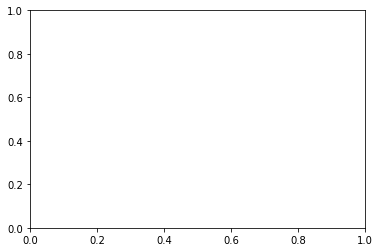

In [22]:
plt.plot(range(1,51), acc, color='b')
plt.xlabel('K values')    
plt.ylabel('CV Accuracy')
plt.title('CV accuracy vs K values')
plt.show()

In [23]:
# test performance
start_time = time.time()
print("Running ...") 
print ("\tK\t\tF1-score\tAccuracy")

knn_model = KNeighborsClassifier(n_neighbors=best_K)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
test_f1score = f1_score(y_test, y_pred, average='weighted')
print ("\t{:f}\t{:f}\t{:f}".format(best_K, test_f1score, test_acc))
print ("Confusion matrix")
print (confusion_matrix(y_test, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("K-NN")
parameters_r.append("No. of neighbours = {}".format(best_K))
f1score_r.append(test_f1score)
accuracy_r.append(test_acc)

Running ...
	K		F1-score	Accuracy


KeyboardInterrupt: 

# Support Vector Machine with RBF

In [ ]:
g = [1e-3, 1e-4]
C = [1, 10, 100, 1000]

gamma_ = []
c_val = []
fscore = []
accur = []
print("Running ...")

print ("\tGamma\t\tC value\t\tF1-score\tAccuracy")

for i in range(0,2):
    for j in C:
        svc = svm.SVC(C=j, kernel='rbf', gamma=g[i]) 
        y_pred = cross_val_predict(svc, X_train, y_train, cv=10)
        svm_fscore = f1_score(y_train, y_pred, average='weighted')
        svm_accuracy = accuracy_score(y_train, y_pred)
        gamma_.append(g[i])
        c_val.append(j)
        fscore.append(svm_fscore)
        accur.append(svm_accuracy)
        print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(g[i],j,svm_fscore, svm_accuracy))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

Running ...
	Gamma		C value		F1-score	Accuracy


In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_gamma = gamma_[idx]
best_C = c_val[idx]
print ("The best parameters are gamma={}, C={}".format(best_gamma, best_C))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(gamma_, c_val)

ax.plot_surface(X, Y, fscore)
ax.set_xlabel('Gamma')
ax.set_ylabel('C value')
ax.set_zlabel('F1 score')
plt.show()

In [ ]:
start_time = time.time()
print("Running ...")
print ("\tGamma\t\tC value\t\tF1-score\tAccuracy")

svc = svm.SVC(kernel='rbf', gamma=best_gamma, C=best_C)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svm_test_acc = accuracy_score(y_test, y_pred)
svm_test_f1score = f1_score(y_test, y_pred, average='weighted')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_gamma, best_C, svm_test_f1score, svm_test_acc))
print ("Confusion matrix")
print (confusion_matrix(y_test, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("SVM")
parameters_r.append("Gamma={} C={}".format(best_gamma, best_C))
f1score_r.append(svm_test_f1score)
accuracy_r.append(svm_test_acc)

# Random Forest

In [ ]:
depth = [300,500,600]
trees = [200,500,700]

depth_ = []
trees_ = []
fscore = []
accur = []

print("Running ...")

print ("\tDepth\t\tNo. of Trees\tF1-score\tAccuracy")

for i in range(0,2):
    for j in trees:
        rfclf = RandomForestClassifier(n_estimators=j, max_depth=depth[i], random_state=444)
        y_pred = cross_val_predict(rfclf, X_train, y_train, cv=10)
        rf_f1score = f1_score(y_train, y_pred, average='weighted')
        rf_accuracy = accuracy_score(y_train, y_pred)
        depth_.append(depth[i])
        trees_.append(j)
        fscore.append(rf_f1score)
        accur.append(rf_accuracy)
        print "\t{:f}\t{:f}\t{:f}\t{:f}".format(depth[i],j,rf_f1score, rf_accuracy)
        
print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

In [ ]:
print ("The highest f1 score is {}". format(max(fscore)))
idx = fscore.index(max(fscore))
best_depth = depth_[idx]
best_trees = trees_[idx]
print ("The best parameters are tree depth={} with no. of trees={}".format(best_depth, best_trees))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(depth_, trees_)

ax.plot_surface(X, Y, fscore)
ax.set_xlabel('Tree depth')
ax.set_ylabel('No. of trees')
ax.set_zlabel('F1 score')
plt.show()

In [ ]:
start_time = time.time()
print("Running ...")
print ("\tDepth\t\tNo. of Trees\tF1-score\tAccuracy")

rfclf = RandomForestClassifier(n_estimators=best_trees, max_depth=best_depth, random_state=444)
rfclf.fit(X_train,y_train)
y_pred = rfclf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred)
rf_test_f1score = f1_score(y_test, y_pred, average='weighted')
print ("\t{:f}\t{:f}\t{:f}\t{:f}".format(best_depth, best_trees, rf_test_f1score, rf_test_acc)) 
print ("Confusion matrix")
print (confusion_matrix(y_test, y_pred))

print("="*40)
runtime = time.time() - start_time
print("--- Running time: %s seconds ---" % (runtime))

classifier_r.append("RF")
parameters_r.append("Depth={} Trees={}".format(best_depth, best_trees))
f1score_r.append(rf_test_f1score)
accuracy_r.append(rf_test_acc)

# DNN

In [9]:
data_headers = ['SESS_ID','HITS_SEQ','PD_BUY_AM','SESS_SEQ','CLNT_AGE','weekday/weekend','CITY_NM','CLNT_GENDER','CLAC0_NM']
data = TotalData
X_train, X_test, y_train, y_test = train_test_split(data[data_headers[:-1]],data[data_headers[-1]], train_size=0.7)

In [83]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [91]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam, SGD
from keras import metrics
## sequential model 
seq_model = Sequential([
    Dense(512, input_shape=(8,), activation='relu'), 
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

print("#### Sequential Model")
seq_model.summary()
seq_model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              metrics=[metrics.categorical_accuracy])
train_history = seq_model.fit(X_train, y_train, epochs=1, batch_size=500, verbose=2)
train_history = train_history.history # epoch마다 변화한 loss, metric

loss_and_metric = seq_model.evaluate(X_train, y_train, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))
loss_and_metric = seq_model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("test, loss and metric: {}".format(loss_and_metric))

#### Sequential Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_57 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_58 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                330       
Total params: 74,730
Trainable params: 74,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
 - 76s - loss: 15.2822 - categorical_accuracy: 0.0519
train, loss and metric: [15.282200757356833, 0.05186084577056167]
test, loss and metric: [15.286235010610572, 0.05161055243420156]


# Light GBM

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [9]:
data_headers = ['SESS_ID','HITS_SEQ','PD_BUY_AM','SESS_SEQ','CLNT_AGE','weekday/weekend','CITY_NM','CLNT_GENDER','CLAC0_NM']
data = TotalData
X_train, X_test, y_train, y_test = train_test_split(data[data_headers[:-1]],data[data_headers[-1]], train_size=0.7)

In [10]:
X_train=X_train.drop('SESS_ID', 1)
X_test=X_test.drop('SESS_ID', 1)

In [ ]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(X_train)),
                            metrics.roc_auc_score(y_test,m.predict(X_test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(X_train, label=y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, X_train, X_test)

#With Catgeorical Features
cate_features_name = ['HITS_SEQ','PD_BUY_AM','SESS_SEQ','CLNT_AGE','weekday/weekend','CITY_NM','CLNT_GENDER']
model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(model2, X_train, X_test)

C:\Users\pj903\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [18]:
y_train = number.fit_transform(y_train.astype('str'))
y_test = number.fit_transform(y_test.astype('str'))

array([8, 6, 6, ..., 8, 8, 1], dtype=int64)

In [19]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
# define dataset
train_data = lgb.Dataset(X_train, label=y_train,  free_raw_data=True)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data,  free_raw_data=True)

"""
reference: If this is Dataset for validation, training data should be used as reference.

free_raw_data: bool, optional (default=True)
If True, raw data is freed after constructing inner Dataset.
"""

# para searching
params = {
    'boosting_type': 'gbdt',  # np.random.choice(['dart', 'gbdt']),
    'objective': 'multiclass',
    'num_class':10,
    'metric': ['multi_logloss'], 
    
    'learning_rate': 0.35,
    
    'num_leaves': np.random.randint(64, 128),
    'max_depth': np.random.randint(6, 12),
    'min_data_in_leaf': int(2 ** (np.random.rand()*3.5 + 9)),
    
    'feature_fraction': np.random.rand()*0.35+0.65,
    'bagging_fraction': np.random.rand()*0.35+0.65,
    'bagging_freq': 1,
    
    'lambda_l1': 10 ** (np.random.rand() * 4),
    'lambda_l2': 10 ** (np.random.rand() * 3 + 2),
    'min_gain_to_split': 0.0,
    'min_sum_hessian_in_leaf': 0.1,
    
    'num_threads': 16,
    'verbose': 0,
    'is_training_metric': 'True'
}
print('Hyper-parameters:')
print(params)
  
evals_result = {}  # dict to store evaluation results of all the items in `valid_sets`

gbm = lgb.train(params, train_data, 5000, valid_sets=[train_data, test_data], \
                valid_names = ['train', 'valid'], evals_result=evals_result, \
                early_stopping_rounds=250, verbose_eval=100, 
                categorical_feature='auto')
"""
categorical_feature : list of strings or int, or 'auto', optional (default="auto")
Categorical features.
If list of int, interpreted as indices.
If list of strings, interpreted as feature names (need to specify ``feature_name`` as well).
If 'auto' and data is pandas DataFrame, pandas categorical columns are used.
"""
  
# save best round results to csv
bst_round = np.argmax(evals_result['valid']['auc'])
trn_auc = evals_result['train']['auc'][bst_round]
trn_loss = evals_result['train']['binary_logloss'][bst_round]
val_auc = evals_result['valid']['auc'][bst_round]
val_loss = evals_result['valid']['binary_logloss'][bst_round]

print('Best Round: %d'%bst_round)
print('Training loss: %.5f, Validation loss: %.5f'%(trn_loss, val_loss))
print('Training AUC : %.5f, Validation AUC : %.5f'%(trn_auc, val_auc))
  
feature_importance = pd.DataFrame({'name':gbm.feature_name(), 'importance':gbm.feature_importance()}).sort_values(by='importance', ascending=False)

Hyper-parameters:
{'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 10, 'metric': ['multi_logloss'], 'learning_rate': 0.35, 'num_leaves': 126, 'max_depth': 10, 'min_data_in_leaf': 2894, 'feature_fraction': 0.6826473680148488, 'bagging_fraction': 0.7441252414291827, 'bagging_freq': 1, 'lambda_l1': 62.42658342519371, 'lambda_l2': 82202.93253313696, 'min_gain_to_split': 0.0, 'min_sum_hessian_in_leaf': 0.1, 'num_threads': 16, 'verbose': 0, 'is_training_metric': 'True'}
Training until validation scores don't improve for 250 rounds.
[100]	train's multi_logloss: 1.59428	valid's multi_logloss: 1.59272
[200]	train's multi_logloss: 1.57344	valid's multi_logloss: 1.57208
[300]	train's multi_logloss: 1.56173	valid's multi_logloss: 1.56058
[400]	train's multi_logloss: 1.55509	valid's multi_logloss: 1.55416
[500]	train's multi_logloss: 1.55023	valid's multi_logloss: 1.5495
[600]	train's multi_logloss: 1.54607	valid's multi_logloss: 1.54553
[700]	train's multi_logloss: 1.54276	valid's

ValueError: attempt to get argmax of an empty sequence

# Xgboost